# Chapter 12 - Linear Models

# 12.2 Simple Linear Regression

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Let's load data from the seaborn library

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


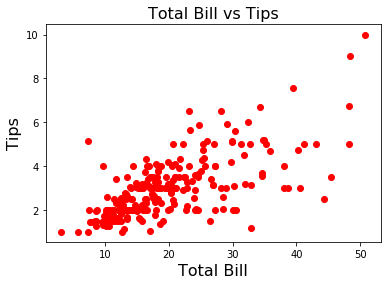

In [3]:
# Let's plot the data we are going to correlate using the simple linear regression model
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(tips["total_bill"],tips["tip"], c='red',marker='o')                                    # Defining the plot name


# Labels
plt.title("Total Bill vs Tips", fontsize=16)
plt.xlabel("Total Bill", fontsize=16)
plt.ylabel("Tips", fontsize=16)
plt.show()

# 12.2.1 Using statsmodels (it's a library)

In [4]:
# We will use the formula API from statsmodels

import statsmodels.formula.api as sm

In [5]:
# To perform simple Linear regression, use the ols function(ordinary least squares).
# total_bill is the X, is the predictor and goes on the right side of the tilde(~)

#Specify model
model = sm.ols(formula = "tip ~ total_bill", data = tips) 

# Fit the data to the model
results = model.fit()

#Look at the results
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           6.69e-34
Time:                        20:29:27   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Looking at the coefficients of y = mx+b. 
# Where "intercept is b", and the other is the slope

results.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

In [7]:
# getting the confidence interval which is less than [0.025   0.975]. 
# Column 0 : confidence less than 0.025
# Column 1 : COnfidence less than 0.975


results.conf_int()
# dir(results) ========== Quantities of interest can be extracted directly from the fitted model. 

,0,1
Intercept,0.605622,1.234918
total_bill,0.090517,0.119532


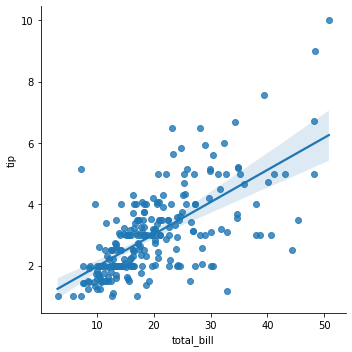

In [8]:
# regression plot in Seaborn

# Data to plot using lmplot
fig = sns.lmplot(x = "total_bill", y = "tip",  data = tips)


# 12.2.2 Using sklearn

In [9]:
from sklearn import linear_model

In [10]:
# Create our linear regression object
lr = linear_model.LinearRegression()


In [11]:
# Specify the predictor X and the response, y. (X is in upper case)

# Sklearn is built in numpy arrays and I may need to reshape the data to make it work.

# This will because of that.
#predicted = lr.fit(X= tips["total_bill"], y = tips["tip"])



In [12]:
# Reshaping (1,-1) or (-1,1)

# Specify the predictor X and the response, y. (X is in upper case)

predicted = lr.fit(X= tips["total_bill"].values.reshape(-1,1), y = tips["tip"])

In [13]:
# # Looking at the coefficients of y = mx+b. 
# Where "intercept is b", and the other is the slope

print(predicted.coef_)           # Y
print(predicted.intercept_)     # slope


[0.10502452]
0.9202696135546731


# 12.3 Multiple regression 

# 12.3.1 Using statsmodels

In [14]:
# To perform multiple Linear regression, use the ols function(ordinary least squares).
# total_bill is the X, is the predictor and goes on the right side of the tilde(~)
# add covariates to the right side of the tilde

#Specify model
model = sm.ols(formula = "tip ~ total_bill+size", data = tips) 

# Fit the data to the model
results = model.fit()

#Look at the results
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           9.67e-34
Time:                        20:29:28   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Looking at the coefficients of y = (b1*x1) + (b2*x2) + (b3*x3...) + c
# Where the intercept is "c"

results.params

Intercept     0.668945
total_bill    0.092713
size          0.192598
dtype: float64

# 12.3.2 Using statsmodels with categorical variables

In [32]:
# Let's see the information of the dataset

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [17]:
# Categorical variables. These are binaries, either male or female and we need to create dummy 
#variables


tips.sex.unique()

[Female, Male]
Categories (2, object): [Female, Male]

In [18]:
# Statsmodel will automatically create dummy variables

#Specify model
model = sm.ols(formula = "tip ~ total_bill + size + sex + smoker + day + time", data = tips) 

# Fit the data to the model
results = model.fit()

#Look at the results
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.20e-28
Time:                        20:29:28   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.310      0.022       0.087       1.095
sex[T.Female]      0.0324      0.142      0.229      0.819      -0.247       0.311
smoker[T.No]       0.0864      0.147      0.589      0.556      -0.202       0.375
day[T.Fri]         0.1623      0.393      0.412      0.680      -0.613       0.937
day[T.Sat]         0.0408      0.471      0.087      0.931      -0.886       0.968
day[T.Sun]         0.1368      0.472      0.290      0.772      -0.793       1.066
time[T.Dinner]    -0.0681      0.445     -0.153      0.878      -0.944       0.808
total_bill         0.0945      0.010      9.841      0.000       0.076       0.113
size               0.1760      0.090      1.966      0.051      -0.000       0.352
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

# 12.3.3. Using sklearn

In [20]:
# Create our multiple linear regression object
lr = linear_model.LinearRegression()

In [21]:
# Specify the predictor X's and the response, y. (X is in upper case)
# Since we are performing multiple regression, we don't need to reshape our X values

predicted = lr.fit(X= tips[["total_bill","size"]], y = tips["tip"])

In [22]:
# Looking at the "b" coefficients and the intercept "c"

print(predicted.coef_)           # b coeffcients
print(predicted.intercept_)     # c, the intercept

[0.09271334 0.19259779]
0.6689447408125027


# 12.3.4 Using sklearn with categorical variables

In [23]:
# We have to manually create our dummy variables for sklearn, with Pandas function "get_dummies".
# Sklearn also has a similar function called "OneHotEncoder"

tips_dummy = pd.get_dummies(tips[["total_bill","size", "sex", "smoker", "day", "time"]])
tips_dummy


,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2,1,0,1,0,0,0,1,0,0,1
242,17.82,2,1,0,0,1,0,0,1,0,0,1


In [24]:
# to drop the reference variable we can pass "drop_first = True"

x_tips_dummy_ref = pd.get_dummies(tips[["total_bill","size", "sex", "smoker", "day", "time"]], 
                                  drop_first = True)
x_tips_dummy_ref

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [25]:
# we fit the model

lr = linear_model.LinearRegression()
predicted = lr.fit(X=x_tips_dummy_ref, y = tips["tip"]) 


In [26]:
# Looking at the "b" coefficients and the intercept "c"

print(predicted.coef_)           # b coeffcients
print(predicted.intercept_)     # c, the intercept

[ 0.09448701  0.175992    0.03244094  0.08640832  0.1622592   0.04080082
  0.13677854 -0.0681286 ]
0.5908374259513769


# 12.4 Keeping index labels from sklearn

In [27]:
import numpy as np

In [28]:
#Create and fit the model

lr = linear_model.LinearRegression()
predicted = lr.fit(X=x_tips_dummy_ref, y = tips["tip"]) 


In [29]:
# get the intercept along with other coefficients
values = np.append(predicted.intercept_, predicted.coef_)
values


array([ 0.59083743,  0.09448701,  0.175992  ,  0.03244094,  0.08640832,
        0.1622592 ,  0.04080082,  0.13677854, -0.0681286 ])

In [37]:
# get the names of the values
names = np.append("intercept", x_tips_dummy_ref.columns)
names


array(['intercept', 'total_bill', 'size', 'sex_Female', 'smoker_No',
       'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner'], dtype=object)

In [38]:
# Put everything in a labeled dataframe
results = pd.DataFrame(values, index = names,
                      columns =["coef"])
results

,coef
intercept,0.590837
total_bill,0.094487
size,0.175992
sex_Female,0.032441
smoker_No,0.086408
day_Fri,0.162259
day_Sat,0.040801
day_Sun,0.136779
time_Dinner,-0.068129
